# Week 5 - Bivariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta


# # Set default figure size and style
# plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['lines.linewidth'] = 0.5
# plt.rcParams['lines.markersize'] = 3
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8

# 1. Lesson: Bivariate graphs

In this lesson, we'll consider some bivariate plots: scatter plots, line plots, waterfall plots, area plots, and pair plots.  We'll also look at bivariate statistics such as correlations, ratios, and percentages.  First, let's create some data.

In [174]:
np.random.seed(0)
numpoints = 100

lesson_series_uniform   = np.round(np.random.random(size = numpoints) * 100, 2)
lesson_series_base      = np.round(np.random.random(size = numpoints)**2 * 100, 2)
lesson_series_skewed    = lesson_series_base + np.random.normal(scale = 10, size = numpoints)
lesson_series_reverse   = 100 - lesson_series_base + np.random.normal(scale = 10, size = numpoints)

## Scatter

This scatter plot puts one series against another.  The two series are anticorrelated - one goes up when the other goes down.

<Axes: >

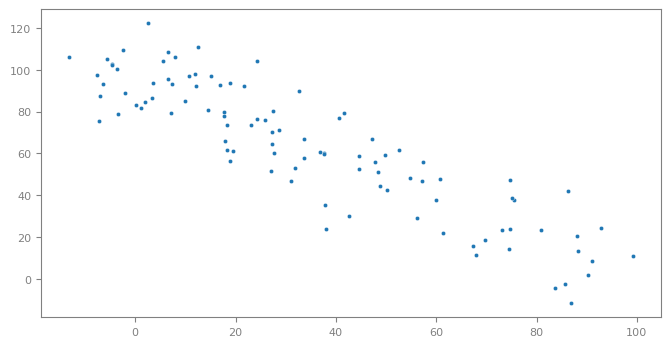

In [175]:
sns.scatterplot(x = lesson_series_skewed, y = lesson_series_reverse)

## Pair plots

This pair plot compares three series against one another.  The diagonal shows the histogram of each series, while the non-diagonal entries plot two different series against each other.  The result in column 1, row 2 is a scatter plot that compares series #1 with series #2.  In effect, when the logic of the pair plot tells us to plot a series against itself (column 1, row 1), we draw a histogram.  (It would be silly to draw a scatter plot of a series against itself).  Because series #1 is not based on the "base" series, it is not correlated with series #2 or series #3, so the four scatter plots that compare series #1 to #2 and #3 look patternless.  The two scatter plots that compare series #2 with series #3 do appear to be correlated due to the "base" series that they share in common.

In [176]:
df = pd.DataFrame(np.array([lesson_series_uniform, lesson_series_skewed, lesson_series_reverse]).T, 
                  columns = ['uniform', 'skewed', 'reverse']
                  )

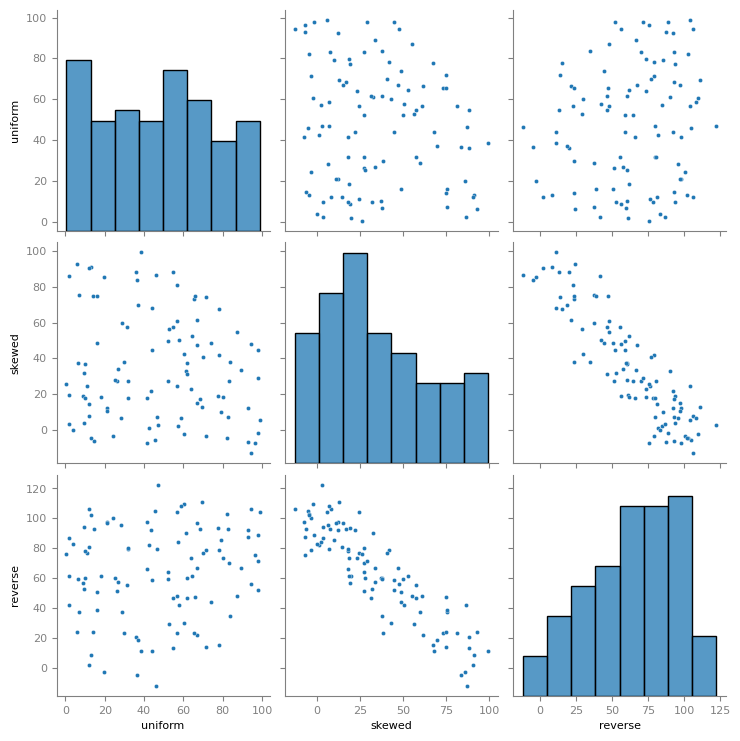

In [177]:
sns.pairplot(df)

## Correlations

We can compute the correlation coefficience between each pair.

In [178]:
print("Correlations:\n", df.corr())

Correlations:
           uniform    skewed   reverse
uniform  1.000000 -0.145022  0.149771
skewed  -0.145022  1.000000 -0.894549
reverse  0.149771 -0.894549  1.000000


This shows that there is a strong negative correlation between the "skewed" and "reverse" datasets (a larger negative number in row 2, column 3 and in row 3, column 2) and almost no correlation between the "uniform" dataset and the others (the much smaller numbers at those locations in the table.)

### Q: What is a correlation telling us?

If the correlation is large (close to 1) it tells us that the two variables are usually either both large or both small in value.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the lower left to upper right.

If the correlation is very negative (close to -1), it tells us that when one variable is large, the other is small.  If we graphed them on a scatter plot, the shape would be close to a straight line, positioned diagonally from the upper left to lower right.

If the correlation is zero, it tells us that the two variables, plotted on a scatter plot, would form a cloud.  The cloud can have different shape - for instance, it could be square or circular - but it cannot look like a diagonal line.  Knowing the value of one variable would tell you nothing about the value of the other variable.  (At least, it would not tell you whether the other variable is large or small).

The correlation coefficients above are called by the letter R.  R can be positive or negative, and lies between -1 and 1.  If we square R, we get a value called $R^2$ which is sometimes used to describe the correlation.  Unless R = 0 or 1, $R^2$ will be smaller in magnitude than R (and always positive), which means that it is very important to know if you are talking about R or $R^2$.  Since the values above can be negative, you can know for sure that they are R values, not $R^2$.

### Q: How do you decide if a correlation is strong?

It depends on the application.  Some sources say that a correlation of R = 0.7 or 0.8 is strong, but in other applications (say, the social sciences) a correlation of 0.5 might be considered quite strong.  It is not unusual for social scientists to report correlations even as low a 0.2 as being important.

### Q: What is the purpose of finding a correlation?

Here are a few:

1. Variables that are correlated with a target variable might be especially useful in `predicting` that variable.  This might also suggest that a linear model could work.  On the other hand, just because there are no pairwise correlations doesn't mean that a linear model won't work.  For example, if you select X, Y, and Z from this list of four possibilities: \[\[X = 1, Y = 0, Z = 0], \[X = 0, Y = 1, Z = 0], \[X = 0, Y = 0, Z = 1], \[X = 1, Y = 1, Z = 1]] then any two variables are completely uncorrelated, but the sum of the three is usually 1.  So the linear model Z = 1 - X - Y is accurate in three out of four cases even though all pairwise correlations are zero.

2. `Variables that are very correlated with each other might be redundant`.  In the extreme case, two variables that have a correlation of 1.0 are "`linearly dependent`" - they essentially provide the same information.  For example, if one column is a height in inches, and another is a height in centimeters, then they are redundant.  Moreover, if you use two highly correlated variables as predictors, the results will be somewhat unpredictable.  For example, if HI is the height in inches and HC is the height in centimeters, then the following formulas are all equivalent: HC, 2.54 * HI, 0.5 * HC + 1.27 * HI, 1001 * HC - 2540 * HI.  So there's no knowing which one you'll get if you try to build a model based on these variables.  The last one in particular is a little bit surprising, given the large coefficients, but it could very well be the result of a linear regression analysis.

3. Correlation can help you to `detect problems with the data`.  If two variables are correlated but shouldn't be, or if they're not correlated but should be, there might be something wrong with the data.  It's important to test the data to see if it makes sense.

4. Correlations can be `interesting things to report`.  If your client or organization is asking for a verbal explanation of the dataset, they might be interested in knowing about any correlations for reasons of their own.

## Waterfall

A waterfall chart shows a value after a sequence of inputs and outputs.

In [179]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = 'This title is not displayed',
    orientation = 'v',
    measure = ['absolute','relative','relative','relative','relative'],
    x = ["2023-Jan", "receipts-in", "interest-in", "expenses-out", "interest-out", "2024-Jan"],
    textposition = 'outside',
    text=['Total','after-receipts','after-interest','after-expenses','after-interest'],
    y=[123.45, 42.08, 21.97, -54.31, -50.23],
    connector=dict(line=dict(color='rgb(63, 63, 63)'))
))

fig.update_layout(
    title='Waterfall Plot',
    showlegend=False
)
fig.update_yaxes(range=[-1,230])
fig.show()

## Line

A line plot is typically associated with a time or date range.  It shows how a variable rises and falls over a period of time.

<Axes: xlabel='None'>

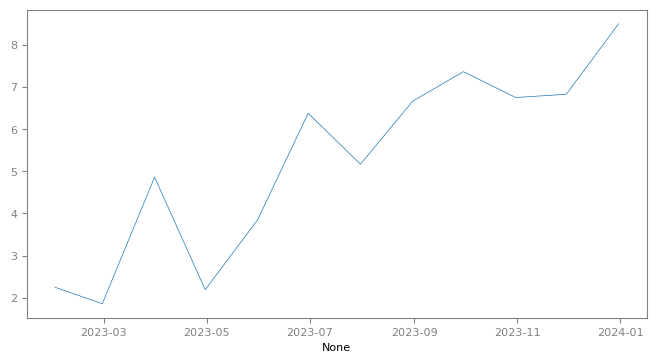

In [180]:
numdates    = 12
time_series = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
datearray   = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
sns.lineplot(x = datearray, y = time_series)

## Area plot

An area plot stacks one curve on top of another.  In the graph below, the top line shows the sum of the two series (ser1 + ser2) while the bottom line just shows ser1.

<Axes: >

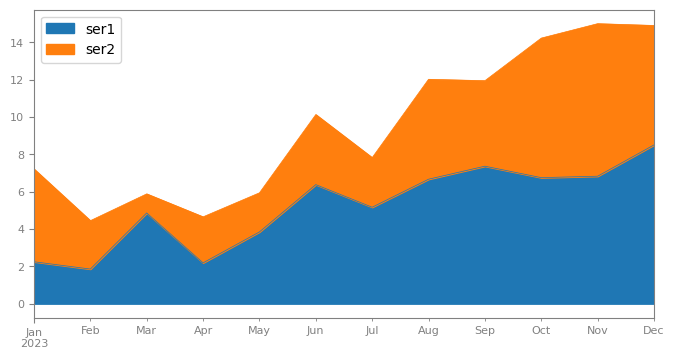

In [181]:
time_series_2 = np.random.random(size = numdates) * 5 + np.arange(numdates) / 3
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 2. Weekly graph question

Below is a pair plot showing the correlation between the levels of chemical A, B, and C in a water sample.  
- If you had to choose just _three_ of the nine graphs in the pair plot to display, which would you choose?  
- How would you alter the way these graphs are displayed to make them clearer or more informative?  
- Would you fit any of these graphs to a line or curve?  Why or why not?  
- What if you had to choose just _one_?  
- What if you had to choose _six_?

In [182]:

np.random.seed(0)
num_data    = 100
base_data   = np.random.random(size = num_data)
chem1       = base_data + np.random.normal(size = num_data) * 0.1
chem2       = base_data**2 + np.random.normal(size = num_data) * 0.1
chem3       = 1 - base_data + np.random.normal(size = num_data) * 0.1
df_chem     = pd.DataFrame({'chem1':chem1,'chem2':chem2,'chem3':chem3})

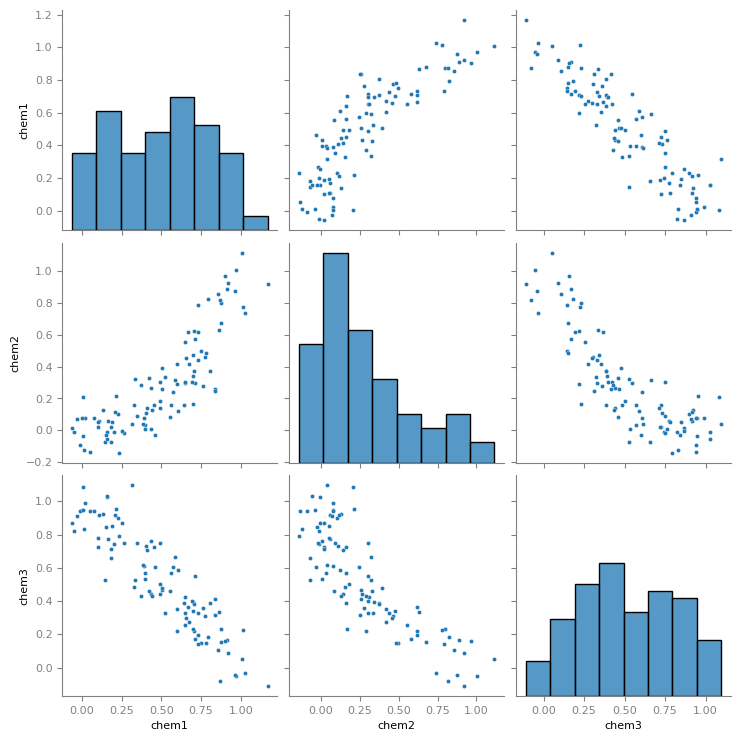

In [183]:
sns.pairplot(df_chem)

### <font color='plum'> ANSWER

#### Choose 3 from the pairplot ?
- chem1 vs chem2 – nonlinear (possibly quadratic) relationship.
- chem1 vs chem3 – strong negative linear correlation.
- chem2 vs chem3 – curved, inverse relationship.

#### How to improve the plots ?
- Use transparency (alpha) to reduce overplotting.
- Label axes clearly, display units if possible
- Add regression lines or curves to highlight trends.
- Use color or hue to encode another variable (if available).

#### Fit to line or curve ?
- chem1 vs chem2: Fit a quadratic curve 
- chem1 vs chem3: Fit a linear regression line – strong negative linear trend.
- chem2 vs chem3: Maybe a logarithmic or inverse curve

#### Choose One ?
- chem1 vs chem3 – a strong, interpretable linear relationship .

#### Choose Six ?
- I would keep my original choices and then add the histograms on the diagonal so I have a view of pairwise relationships and individual distributions.


# 3. Homework - Reproducing Pair Plot Graphs

I'm going to show you some Pair Plot (Scatter and Histogram) graphs.  I'd like you to generate some data that will generate those graphs.

Example: this cloud involves a match between two normal distributions.

<Axes: xlabel='data1', ylabel='data2'>

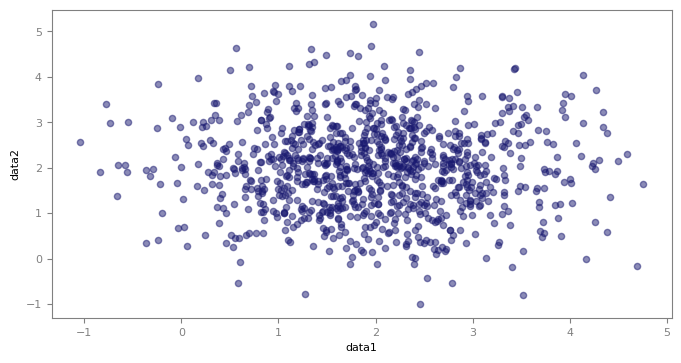

In [184]:
num_points = 1000
np.random.seed(0)

data1 = np.random.normal(size = num_points) + 2
data2 = np.random.normal(size = num_points) + 2

df_twonorm = pd.DataFrame({"data1":data1,"data2":data2})

df_twonorm.plot.scatter(x = "data1", y = "data2", color = 'midnightblue',alpha = 0.5)

#### **Problem: Can you design data that will generate the following scatter plot?**  

You may need to join multiple series to make one big series for the y-axis data.  That will allow you to create the two clouds. Use Google or ChatGPT to find the function that does that.  It is okay if the precise numbers are not re-created; just the general shape: two vertically separated clouds of points.

In [185]:
# from IPython.display import Image
# Image("twoclouds.png")

##### <font color='plum'> ANSWER

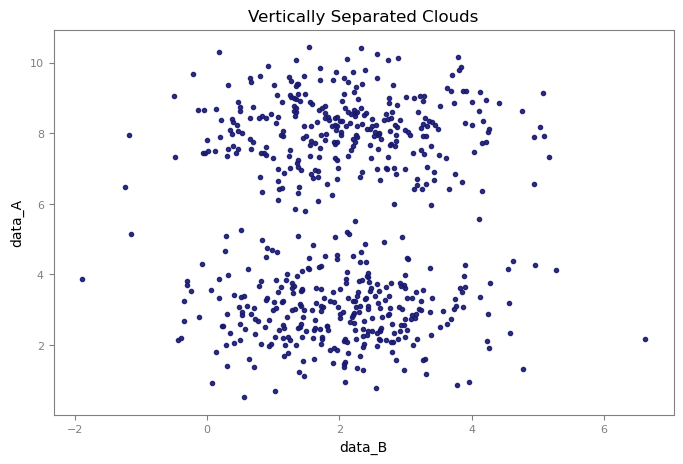

In [186]:

np.random.seed(42)

# Define the number of points for each cloud
num_points = 300

# --- Generate Data for the Lower Cloud, Centered around x=2, y=3
x_lower = np.random.normal(loc=2, scale=1.2, size=num_points)
y_lower = np.random.normal(loc=3, scale=1, size=num_points)

# --- Upper Cloud, Centered around x=2, y=8
x_upper = np.random.normal(loc=2, scale=1.2, size=num_points)
y_upper = np.random.normal(loc=8, scale=1, size=num_points)

# --- Combine the data series ---
# This creates the single large series mentioned in the problem description
x_combined = np.concatenate([x_lower, x_upper])
y_combined = np.concatenate([y_lower, y_upper])

# --- Create Plot ---
plt.figure(figsize=(8, 5))
plt.scatter(x_combined, y_combined, alpha=0.9, color='midnightblue')

# Add labels and a title to match the example
plt.xlabel("data_B", fontsize=10)
plt.ylabel("data_A", fontsize=10)
plt.title("Vertically Separated Clouds", fontsize=12)

# Display the plot
plt.show()

#### **Challenge problem!**
Hint: you will need two series, and three segments of the first series will connect with the three segments of the second series.

In [187]:
# from IPython.display import Image
# Image("threeclouds.png")

##### <font color='plum'> ANSWER 

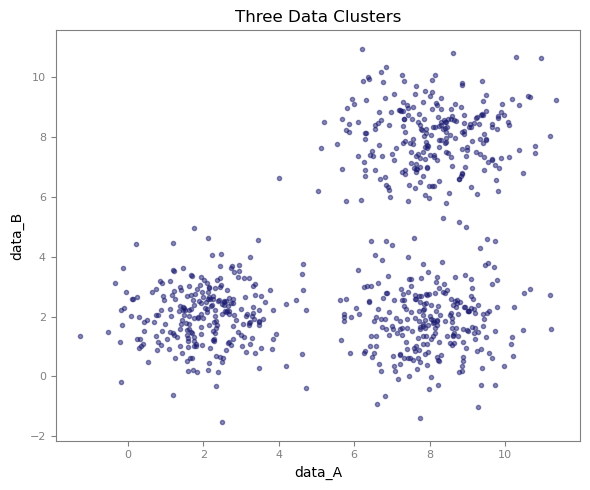

In [188]:
# Set a seed for reproducibility
np.random.seed(10)

# Define the number of points for each cluster
num_points = 250

# --- Generate Data for the Three Clusters ---

# Cluster 1: Lower-Left
x1 = np.random.normal(loc=2, scale=1.1, size=num_points)
y1 = np.random.normal(loc=2, scale=1.1, size=num_points)

# Cluster 2: Lower-Right
x2 = np.random.normal(loc=8, scale=1.2, size=num_points)
y2 = np.random.normal(loc=2, scale=1.2, size=num_points)

# Cluster 3: Upper-Right
x3 = np.random.normal(loc=8, scale=1.2, size=num_points)
y3 = np.random.normal(loc=8, scale=1.2, size=num_points)


# --- Combine the data into a single dataset ---
x_combined = np.concatenate([x1, x2, x3])
y_combined = np.concatenate([y1, y2, y3])

# --- Create the Plot ---
plt.figure(figsize=(6, 5))
plt.scatter(x_combined, y_combined, alpha = 0.5, color = 'midnightblue')
plt.xlabel("data_A", fontsize=10)
plt.ylabel("data_B", fontsize=10)
plt.title("Three Data Clusters", fontsize=12)
plt.tight_layout()
plt.show()


##### **Q: Would you expect to see a correlation for this challenge problem?**

 (Hint: does knowing the value of `data_A` tell you anything about the value of `data_B` - in particular, whether it is large or small?)  If you managed to reproduce the graph using data, test it yourself using the `corr()` function.

In [189]:
# CORRELATION MATRIX
df = pd.DataFrame({'data_A': x_combined, 'data_B': y_combined})
correlation_matrix = df.corr()
correlation_matrix

,data_A,data_B
data_A,1.000000,0.426419
data_B,0.426419,1.000000


##### <font color='plum'> ANSWER 

There seems to be an overall positive correlation. For instance, for lower values of data_A (btwn 0 and 4), data_B also has lower values within the same range. 

For higher values of data_A ( [6,10] ), the possible values for data_B are, on average, higher than they were for the low values of data_A.

As data_A increases from left to right, data_B also tends to increase in an upward trend. r(data_A, data_B) =~  0.41. This is a moderate positive correlation, but it'ss insufficient to capture the relationship between 2 variables whose data falls into clusters. 

This is an illustration of *Simpson's Paradox*, where a trend (or correlation) can be observed in combined data that is different from the trend in the constituent subgroups.

#### **Q: Here is a histogram.  Can you provide data that will approximately re-create this histogram?**

It is okay if the precise numbers are not re-created; just the general shape: tailing off on either side, but tailing off to a nonzero number.  (In this case, about 300).

In [190]:
# from IPython.display import Image
# Image("histogram.png")

#### <font color='plum'> ANSWER

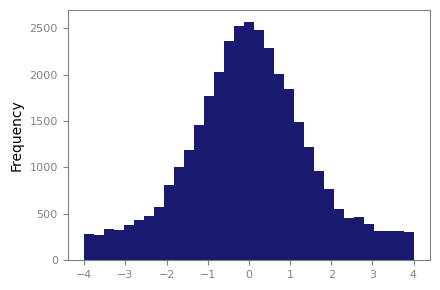

In [191]:
np.random.seed(0)

# --- Define Parameters ---
# We'll generate a large number of points to create a smooth histogram.

# 1. Parameters for the main Normal distribution (the bell curve)
n_normal    = 25000  # Number of points
mean        = 0          # Center of the bell curve
std_dev     = 1.1     # Spread of the bell curve

# 2. Parameters for the Uniform distribution (to create the "fat tails")
n_uniform   = 10000 # Number of points
low         = -4          # Lower bound
high        = 4          # Upper bound


# --- Generate and Combine Data ---

# Generate  main bell curve data
data_normal     = np.random.normal(loc=mean, scale=std_dev, size=n_normal)

# Generate data to lift the tails
data_uniform    = np.random.uniform(low=low, high=high, size=n_uniform)

# Combine both datasets into one array
combined_data   = np.concatenate([data_normal, data_uniform])


# --- Histogram ---
plt.figure(figsize=(4.5, 3))
plt.hist(combined_data, bins=33, range=(-4, 4), label='arr', color='midnightblue')

plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

#### **Q: Create a LINE PLOT that shows a sales volume of soft drinks that decreases, then increases over the course of a year, in a U-shaped curve, but with some noise.**

##### <font color='plum'> ANSWER

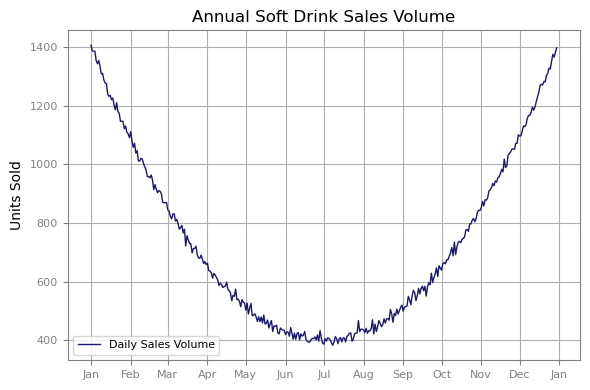

In [197]:
# Set a seed for reproducibility of the random noise
np.random.seed(42)

# 1. Create a time period of 365 days
days_in_year    = 365
dates           = pd.date_range(start='2024-01-01', periods=days_in_year, freq='D')
x_values        = np.arange(days_in_year)

# 2. Create the base U-shaped curve (quadratic function)
# The curve is lowest in the middle of the year (day 182)
mid_year        = days_in_year / 2
minimum_sales   = 400  # The lowest point of the curve
amplitude       = 0.03     # Controls how steep the curve is

# The U-shaped sales trend
sales_trend = amplitude * (x_values - mid_year)**2 + minimum_sales

# 3. Generate random noise
# The `scale` parameter controls the amount of noise
noise       = np.random.normal(loc=0, scale=12, size=days_in_year)

# 4. Combine the trend and the noise to get the final sales data
final_sales = sales_trend + noise

# Ensure sales don't drop below zero
final_sales[final_sales < 0] = 0

# 5. Plot the data
fig, ax     = plt.subplots(figsize = (6, 4))

ax.plot(dates, final_sales, label="Daily Sales Volume", color='midnightblue', linewidth = 1)

# --- Formatting the plot ---
ax.set_title("Annual Soft Drink Sales Volume", fontsize=12 )
ax.set_ylabel("Units Sold", fontsize = 10)

# Format the x-axis to show month abbreviations
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # %b for abbreviated month name

plt.grid(True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

#### **Q: Create an AREA plot that shows the sales volume for two brands of soft drinks, one of which is increasing then decreasing, the other decreasing then increasing.**

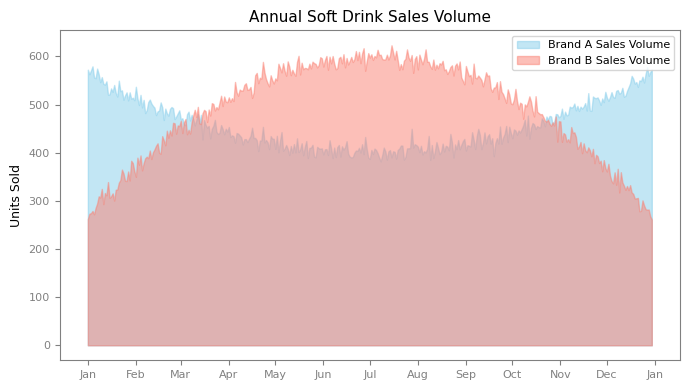

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

np.random.seed(42)

# 1. Create a time period of 365 days
days_in_year    = 365
dates           = pd.date_range(start='2024-01-01', periods=days_in_year, freq='D')
x_values        = np.arange(days_in_year)

# 2. Create the base U-shaped curve (quadratic function) for Brand A
mid_year        = days_in_year / 2
minimum_sales   = 400  # The lowest point of the curve
amplitude_A     = 0.005  # Controls how steep the curve is

# The U-shaped sales trend for Brand A
sales_trend_A = amplitude_A * (x_values - mid_year)**2 + minimum_sales

# 3. Create the inverted U-shaped curve (quadratic function) for Brand B
amplitude_B     = -0.01  # Inverted curve
maximum_sales   = 600  # The highest point of the curve

# The inverted U-shaped sales trend for Brand B
sales_trend_B   = amplitude_B * (x_values - mid_year)**2 + maximum_sales

# 4. Generate random noise
noise_A = np.random.normal(loc=0, scale=12, size=days_in_year)
noise_B = np.random.normal(loc=0, scale=12, size=days_in_year)

# 5. Combine the trend and the noise to get the final sales data
final_sales_A = sales_trend_A + noise_A
final_sales_B = sales_trend_B + noise_B

# Ensure sales don't drop below zero
final_sales_A[final_sales_A < 0] = 0
final_sales_B[final_sales_B < 0] = 0

# 6. Plot data using fill_between
fig, ax = plt.subplots(figsize=(7, 4))

ax.fill_between(dates, final_sales_A, label="Brand A Sales Volume", color='skyblue', alpha=0.5)
ax.fill_between(dates, final_sales_B, label="Brand B Sales Volume", color='salmon', alpha=0.5)

# --- Formatting the plot ---
ax.set_title("Annual Soft Drink Sales Volume", fontsize=11)
ax.set_ylabel("Units Sold", fontsize=9)

# Format the x-axis to show month abbreviations
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # %b for abbreviated month name

plt.grid(False)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


# 4. Storytelling With Data plot



Reproduce any graph of your choice in p. 71-85 of the Storytelling With Data book as best you can.  (The first half of chapter three).

<font color='plum'> Figure 3.12 from page 80 of Storytelling with Data

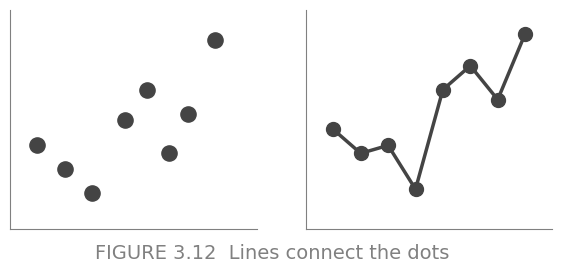

In [209]:

# Data for the first plot (scatter plot)
x1 = [1.0, 2.0, 3.0, 4.2, 5.0, 5.8, 6.5, 7.5]
y1 = [4.2, 3.0, 1.8, 5.5, 7.0, 3.8, 5.8, 9.5]

# Data for the second plot (line plot)
x2 = [1, 2, 3, 4, 5, 6, 7, 8]
y2 = [5, 3.8, 4.2, 2, 7, 8.2, 6.5, 9.8]

# Create the figure and a 1x2 grid of subplots
# Increased the figure width to make more room
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# --- First Plot: Scatter Plot ---
ax1.scatter(x1, y1, s=120, color='#444444')

# --- Second Plot: Line Plot ---
ax2.plot(x2, y2, marker='o', markersize=10, linestyle='-', color='#444444', linewidth=2.5)

# --- Common Formatting for both plots ---
for ax in [ax1, ax2]:
    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set limits for a consistent look
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 11)

# figure caption below the plots
fig.text(0.5, 0.05, 'FIGURE 3.12  Lines connect the dots', ha='center', fontsize=14, color='gray')

plt.subplots_adjust(wspace=0.2, bottom=0.15)

plt.show()